<a href="https://colab.research.google.com/github/geonextgis/PyImgProc-Image-Processing-using-Python/blob/main/019_Image_Processing_using_SciPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Processing using SciPy**
Image processing using SciPy involves leveraging the powerful capabilities of the SciPy library, which is a collection of mathematical algorithms and functions built on top of NumPy. With SciPy, users can perform various image processing tasks such as filtering, segmentation, feature detection, and more. By utilizing modules like `scipy.ndimage` and `scipy.signal`, one can apply convolution filters, morphological operations, and other advanced techniques to manipulate and analyze images. Additionally, SciPy integrates seamlessly with other Python libraries like Matplotlib for visualization and OpenCV for further processing or computer vision tasks. Its extensive functionality, combined with the flexibility of Python, makes SciPy a valuable tool for image processing tasks in research, academia, and industry.

## **Import Necessary Libraries**

In [120]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
from scipy import ndimage
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'DeJavu Serif'

## **Load an Image**

In [122]:
# Read the image with skimage
img_path = "/content/drive/MyDrive/Colab Notebooks/GitHub Repo/PyImgProc-Image-Processing-using-Python/Datasets/High_Res_RGB_Google_Image.tif"
img = io.imread(img_path)

print("Image Shape:", img.shape)
print("Image Type:", type(img))
print("Image dtype:", img.dtype)

Image Shape: (2048, 2048, 3)
Image Type: <class 'numpy.ndarray'>
Image dtype: uint8


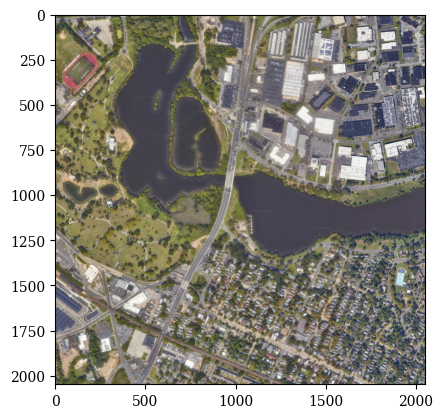

In [123]:
# Show the RGB image
plt.imshow(img);

In [124]:
# Read the image in grayscale
img_grayscale = io.imread(img_path, as_gray=True)

print("Image Shape:", img_grayscale.shape)
print("Image Type:", type(img_grayscale))
print("Image dtype:", img_grayscale.dtype)

Image Shape: (2048, 2048)
Image Type: <class 'numpy.ndarray'>
Image dtype: float64


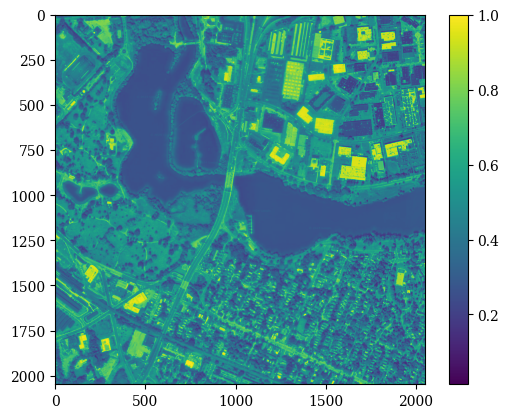

In [125]:
# Show the Grayscale image
plt.imshow(img_grayscale)
plt.colorbar();

🤔 **Note:** <br>
When using `io.imread()` from scikit-image with the `as_gray=True` parameter, it performs automatic conversion of the image to grayscale. This function will read the image from the specified path and convert it to a grayscale representation using a suitable method.

The method employed by scikit-image when `as_gray=True` is typically based on luminance, which takes into account the relative contributions of each color channel to human perception of brightness. The specific formula used for the conversion might not always be explicitly documented, but it generally follows similar principles to the luminance method. This function typically utilizes the following formula to convert an RGB image to grayscale:

$$ I = 0.2125 \times R + 0.7154 \times G + 0.0721 \times B $$

These coefficients are slightly different from the standard luminance coefficients but are based on similar principles. They approximate the human eye's sensitivity to different colors and aim to produce a perceptually accurate grayscale representation of the original image.

## **Extracting Pixel Values**

In [126]:
# Check the pixel values at (0, 0) of RGB and Grayscale image
print(img[0, 0])
print(img_grayscale[0, 0])

[76 82 76]
0.3148721568627451


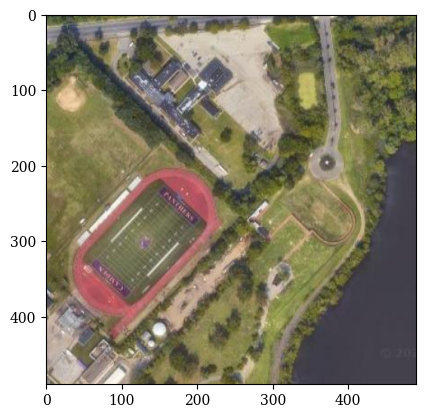

In [127]:
# Slice the RGB image
img_slice = img[10:500, 10:500]

plt.imshow(img_slice);

In [128]:
# Extract the image statistics from the grayscale image
mean_gray = img_grayscale.mean()
max_gray = img_grayscale.max()
min_gray = img_grayscale.min()

print("Grayscale Mean:", mean_gray)
print("Grayscale Max:", max_gray)
print("Grayscale Min:", min_gray)

Grayscale Mean: 0.453228306978637
Grayscale Max: 1.0
Grayscale Min: 0.013795686274509803


## **Flipping Image**

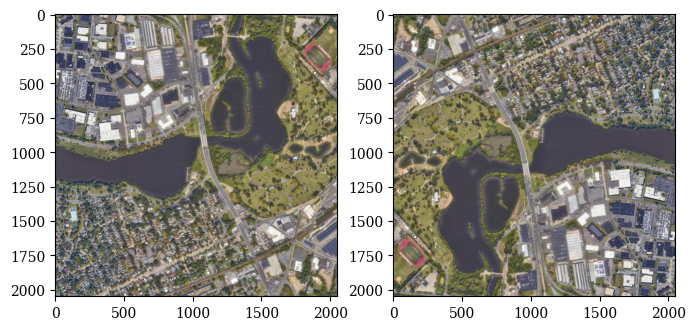

In [129]:
# Flip the image Left to Right and Up to Down
flippedLR = np.fliplr(img)
filppedUD = np.flipud(img)

fig, axes = plt.subplots(ncols=2, figsize=(8, 4))
axes = axes.flatten()

axes[0].imshow(flippedLR)
axes[1].imshow(filppedUD);

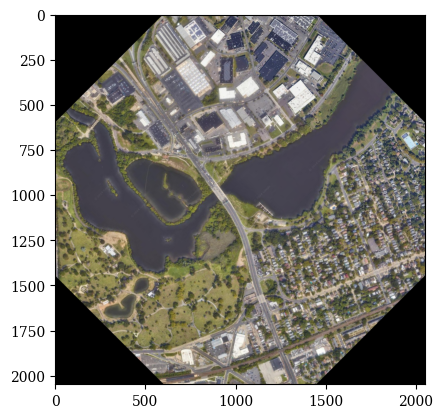

In [130]:
# Rotate the image by 45 degrees
rotated45 = ndimage.rotate(img, angle=45, reshape=False)

plt.imshow(rotated45);

## **Filter Images**

### **Uniform Filter**
A uniform filter, also known as a box filter or a mean filter, is a type of image filter commonly used in image processing for smoothing or blurring an image.

The uniform filter operates by replacing each pixel value in the image with the average of the pixel values in its neighborhood. The size of the neighborhood, or kernel, is usually specified by a square or rectangular window of a certain width and height. The pixel value at the center of the window is replaced with the mean value of all the pixel values within that window.

Mathematically, if $ I(x, y) $ represents the pixel value at coordinates $ (x, y) $ in the original image, and $ k $ is the size of the kernel, then the uniform filter operation can be defined as:

$$ I_{\text{smoothed}}(x, y) = \frac{1}{k^2} \sum_{i=x-\frac{k}{2}}^{x+\frac{k}{2}} \sum_{j=y-\frac{k}{2}}^{y+\frac{k}{2}} I(i, j) $$

where $ I_{\text{smoothed}}(x, y) $ represents the smoothed pixel value at coordinates $ (x, y) $.

The uniform filter is effective in reducing noise in an image and can also be used for blurring effects. However, it may also result in loss of image details since it averages pixel values within the kernel, leading to a loss of sharpness in the image.

Uniform filters are widely used in various image processing applications, including image denoising, image smoothing, and pre-processing steps for feature extraction and object recognition. They are simple to implement and computationally efficient, making them popular choices for basic image filtering tasks.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQXWraGTc3SsHJP31hcIwH-bhy90yXhKtfVdTueDIKG&s" width=50%>

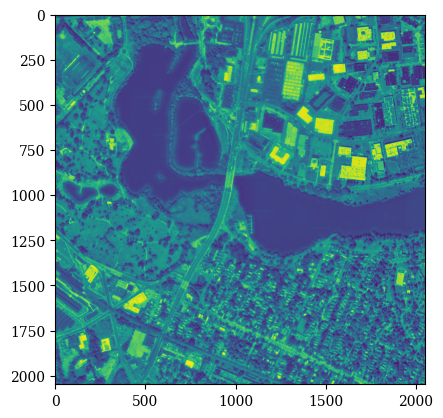

In [131]:
# Apply uniform filter on grayscale image
uniform_filtered = ndimage.uniform_filter(img_grayscale, size=3)
plt.imshow(uniform_filtered);

### **Gaussian Filter**

A Gaussian filter, also known as a Gaussian blur, is a type of image filter used for smoothing or blurring an image. It is named after the Gaussian function, which describes its shape.

The Gaussian filter operates by applying a convolution operation with a Gaussian kernel to the input image. The Gaussian kernel is a two-dimensional matrix with values computed using the Gaussian function. The size of the kernel and the standard deviation $(\sigma)$ parameter control the amount of blurring applied to the image.

Mathematically, the Gaussian function is defined as:

$$ G(x, y) = \frac{1}{{2\pi \sigma^2}} e^{-\frac{x^2 + y^2}{2\sigma^2}} $$

In the context of image processing, the Gaussian kernel is typically created by discretizing this function into a square matrix. The size of the matrix (kernel size) and the standard deviation determine the shape and spread of the Gaussian distribution.

The Gaussian filter operation involves convolving the input image with the Gaussian kernel. For each pixel in the image, the filter computes a weighted average of the pixel values in its neighborhood, where the weights are determined by the values in the Gaussian kernel.

Gaussian filtering is commonly used for various image processing tasks, including noise reduction, edge detection, and feature extraction. It effectively removes high-frequency noise from the image while preserving important details and edges. The amount of blurring can be adjusted by varying the standard deviation parameter and the size of the kernel.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRBI4yGajvrWIlKLbpDeBsFaDZw34nCCusl_59Big5N&s" width=50%>

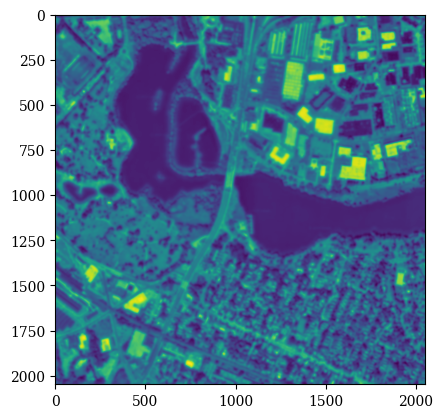

In [132]:
# Apply gaussian filter on grayscale image
gaussian_filtered = ndimage.gaussian_filter(img_grayscale, sigma=5)
plt.imshow(gaussian_filtered);

### **Median Filter**
A median filter is a type of non-linear image filter used for removing noise from an image. Unlike linear filters such as the Gaussian filter or the mean filter, which compute weighted averages of pixel values in the neighborhood, the median filter replaces each pixel's value with the median value of the pixels within its neighborhood.

Here's how the median filter works:

1. **Window**: Similar to other filters, the median filter operates on a sliding window or kernel that moves across the image. The size of the window is usually specified by the width and height of a square or rectangular region.

2. **Median Computation**: For each pixel in the image, the median filter collects the pixel values within the window centered around that pixel.

3. **Median Value**: The filter then sorts the collected pixel values and selects the middle value, which is the median. If the number of pixels within the window is even, the median is calculated as the average of the two middle values.

4. **Replacement**: Finally, the original pixel value at the center of the window is replaced with the computed median value.

The median filter is particularly effective in removing salt-and-pepper noise, which manifests as isolated bright and dark pixels scattered throughout the image. Since the median filter selects the middle value, it is robust to outliers and preserves edges and sharp features better than linear filters.

However, the median filter is computationally more expensive compared to linear filters, especially for larger window sizes, because it involves sorting the pixel values within the neighborhood for each pixel. Despite this drawback, the median filter is widely used in various image processing applications where noise reduction is crucial while preserving image details.

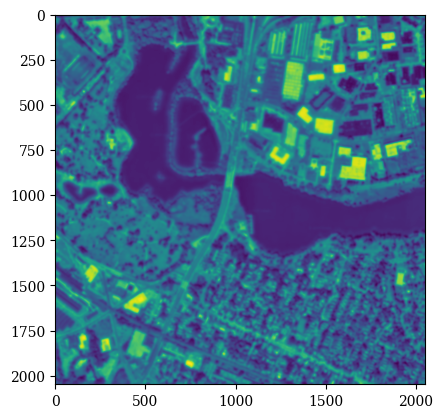

In [133]:
# Apply median filter on grayscale image
median_filtered = ndimage.median_filter(img_grayscale, size=3)
plt.imshow(gaussian_filtered);

### **Sobel Filter**

The Sobel filter, named after its inventor Irwin Sobel, is a widely used edge detection filter in image processing. It is specifically designed to highlight edges in an image by computing the gradient magnitude.

The Sobel filter is based on convolution with a pair of 3x3 kernels: one for detecting horizontal changes in intensity (the Sobel X kernel) and another for detecting vertical changes in intensity (the Sobel Y kernel).

The Sobel X kernel:
```
-1  0  1
-2  0  2
-1  0  1
```

The Sobel Y kernel:
```
-1 -2 -1
 0  0  0
 1  2  1
```

To apply the Sobel filter:

1. Convolve the input image with the Sobel X kernel to compute the horizontal gradient.
2. Convolve the input image with the Sobel Y kernel to compute the vertical gradient.
3. Compute the gradient magnitude at each pixel as the square root of the sum of the squared horizontal and vertical gradients.

The magnitude of the gradient represents the rate of change of intensity in the image, which tends to be higher at edges. By highlighting areas of high gradient magnitude, the Sobel filter effectively identifies edges in the image.

The orientation of the gradient can also be computed from the Sobel X and Y gradients, allowing for edge detection in specific directions.

The Sobel filter is widely used in various image processing tasks, including edge detection, feature extraction, and image segmentation. It is computationally efficient and provides good results for detecting edges in both grayscale and color images.

<img src="https://www.qualcomm.com/content/dam/qcomm-martech/dm-assets/images/developer/blog/sobel.png" width="50%">

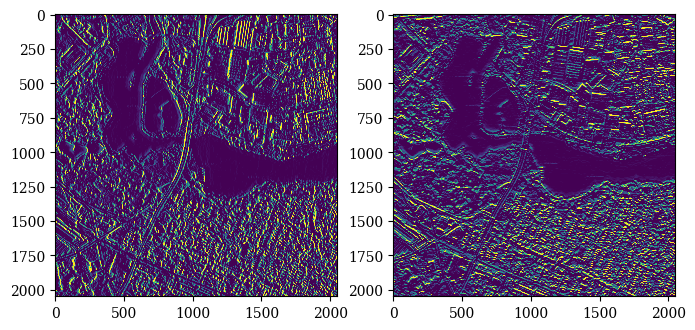

In [134]:
# Apply sobel filter on grayscale image
sobel_filtered_horizontal = ndimage.sobel(img_grayscale, axis=1)
sobel_filtered_vertical = ndimage.sobel(img_grayscale, axis=0)

fig, axes = plt.subplots(ncols=2, figsize=(8, 4))
axes[0].imshow(sobel_filtered_horizontal, vmin=0, vmax=0.2)
axes[1].imshow(sobel_filtered_vertical, vmin=0, vmax=0.2);

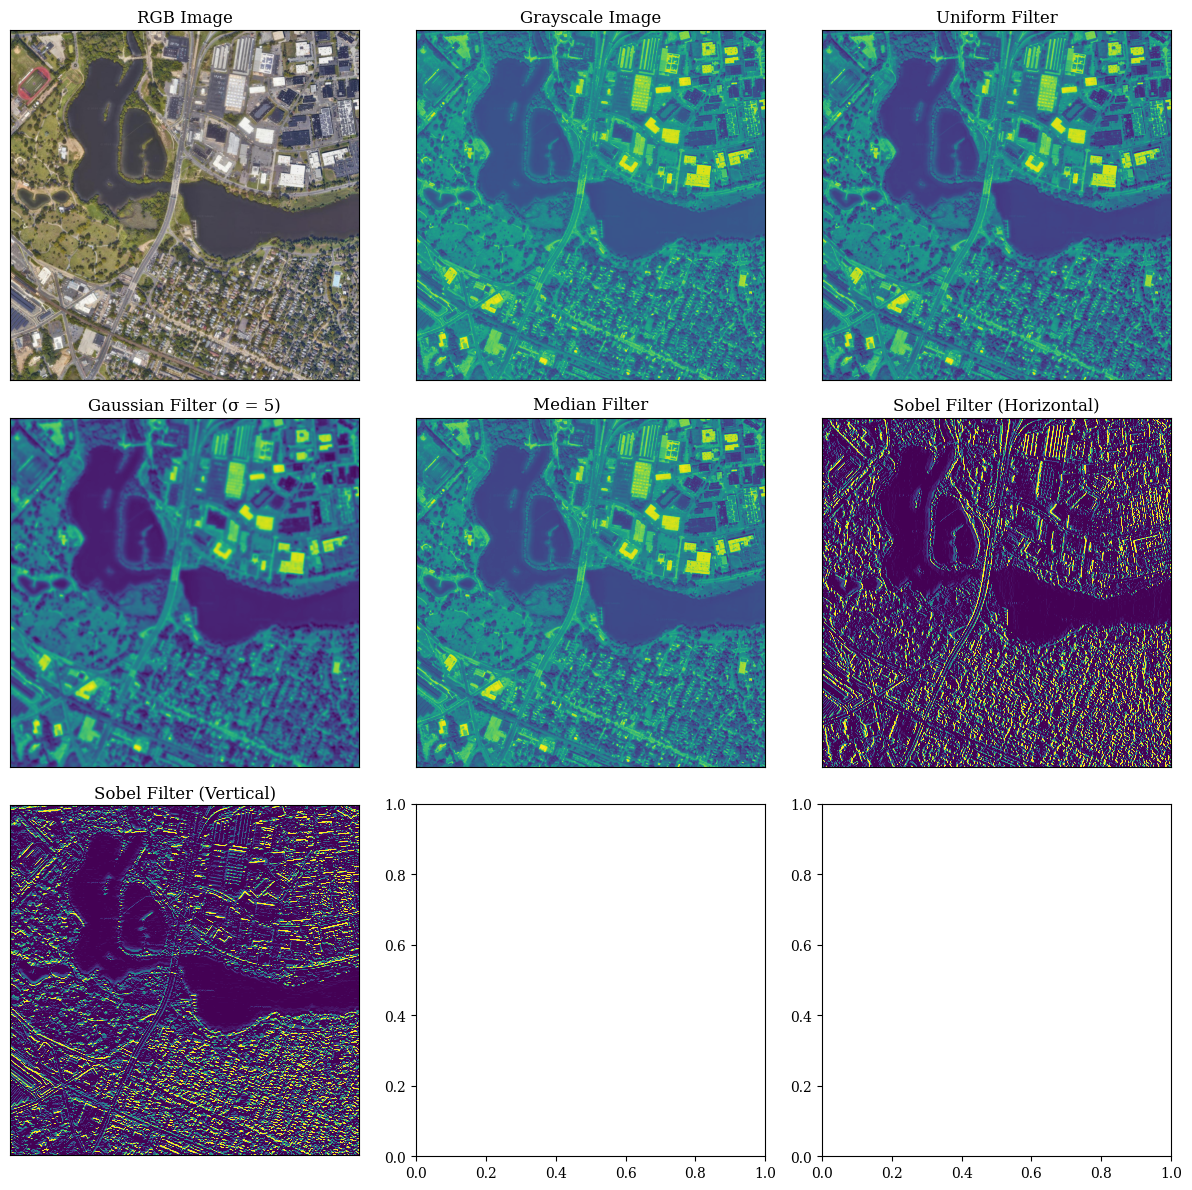

In [139]:
# Plot all the images
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(12, 12))
axes = axes.flatten()

images = [img, img_grayscale, uniform_filtered, gaussian_filtered,
          median_filtered, sobel_filtered_horizontal, sobel_filtered_vertical]

image_names = ["RGB Image", "Grayscale Image", "Uniform Filter", "Gaussian Filter (σ = 5)",
               "Median Filter", "Sobel Filter (Horizontal)", "Sobel Filter (Vertical)"]

for i in range(len(images)):

    if image_names[i] in ["Sobel Filter (Horizontal)", "Sobel Filter (Vertical)"]:
        vmin, vmax = 0, 0.2
    else:
        vmin, vmax = None, None

    axes[i].imshow(images[i], vmin=vmin, vmax=vmax)
    axes[i].set_title(image_names[i], fontsize=12)
    axes[i].set_xticklabels("")
    axes[i].set_yticklabels("")
    axes[i].tick_params(left = False, bottom = False)

plt.tight_layout(pad=1);